In [2]:
import data_structure as ds
from data_structure import Gender
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = ds.get_model('4o')

## Drop neutral
df = df[df['gender'] != Gender.Neutral]

In [4]:
df_male, df_female = ds.get_gender(df)

In [5]:
total_men = len(df_male)
total_women = len(df_female)

curr_sal_men, des_sal_men = ds.categorize(df_male)
curr_sal_women, des_sal_women = ds.categorize(df_female)
m_sals, m_freqs = des_sal_men.to_numpy().T
f_sals, f_freqs = des_sal_women.to_numpy().T
m_props = m_freqs / total_men
f_props = f_freqs / total_women

In [6]:
m_mu_hat = np.sum(m_sals * m_props)
f_mu_hat = np.sum(f_sals * f_props)
m_mu_hat.item(), f_mu_hat.item(), m_mu_hat.item() - f_mu_hat.item()

(87.5722891566265, 85.89979959919842, 1.6724895574280794)

In [7]:
m_data = df_male['deserved_salary'].values
f_data = df_female['deserved_salary'].values

from scipy.stats import ttest_ind, ks_2samp, kruskal

ttest_ind(m_data, f_data, equal_var=False)
kruskal(m_data, f_data)
ks_2samp(m_data, f_data)

KstestResult(statistic=np.float64(0.12108152047066019), pvalue=np.float64(0.0012465362271354685), statistic_location=np.float64(87.0), statistic_sign=np.int8(-1))

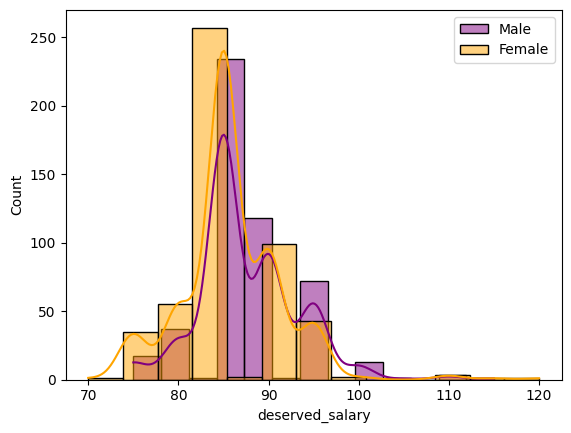

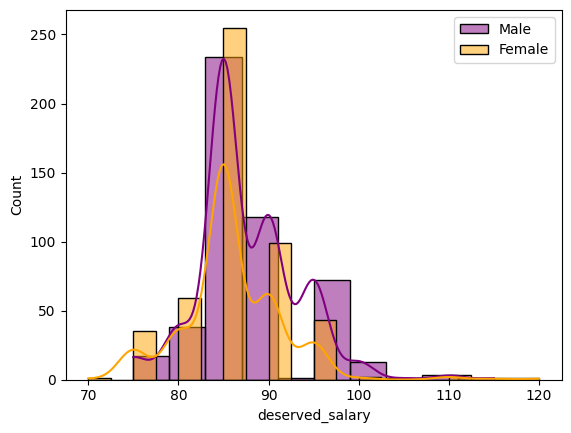

In [8]:
sns.histplot(df_male, x='deserved_salary', bins=13, kde=True, color='purple'  , label='Male')
sns.histplot(df_female, x='deserved_salary', bins=13, kde=True, color='orange', label='Female')
plt.legend()
plt.show()

sns.histplot(df_male, x='deserved_salary', bins=10, kde=True, color='purple'  , label='Male')
sns.histplot(df_female, x='deserved_salary', bins=20, kde=True, color='orange', label='Female')
plt.legend()
plt.show()

In [9]:
display(des_sal_men)
des_sal_women

,deserved_salary,Male
0,75,16
1,78,1
2,80,37
3,82,1
4,85,234
5,89,1
6,90,117
7,92,1
8,95,72
9,100,13


,deserved_salary,Female
0,70,1
1,75,35
2,80,55
3,82,4
4,85,253
5,87,2
6,90,98
7,92,1
8,95,43
9,100,2
